# Analisi Diffusione COVID-19

###    Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data alla voce " ! 1. Download our complete COVID-19 dataset" scaricare il dataset nel formato che si preferisce. 
### 1. Si richiede di verificare le dimensioni del dataset e i relativi metadati 
### 2. Si chiede di trovare, per ogni continente: 
###  a. il numero di casi fin dall'inizio della pandemia 
###  b. la percentuale rispetto al totale mondiale del numero di casi 
### 3. Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati
###  a. l'evoluzione del casi totali dall'inizio alla fine dell'anno 
###  b. il numero di nuovi casi rispetto alla data 
### 4. Riguardo le nazioni di Italia, Germania e Francia: 
###  a. mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso) 
###  b. scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante 
### 5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021: 
###  a. mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients)
###  b. se ci sono dati nulli, con un breve commento scrivere se puo essere possible gestirli tramite sostituzione o meno

## Note

### Prima di effettuare le analisi, effettuate un'EDA del dataset per meglio comprenderne la natura (e non dimenticate ulteriori metadati e descrizioni presenti sulla pagina Github da cui avete scaricato il dataset); in particolare: 
###  ● Fate attenzione alle colonne continent e location; contengono sia dati puntuali che dati aggregati 
###  ○ Prima di iniziare l'analisi, assicuratevi di aver compreso cosa contengono 

###  ● Comprendete bene il contenuto delle colonne new_cases e total_cases 
###  ○ Hanno logiche differenti e ovviamente vanno trattate diversamente


In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Importazione dei dati
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
covid = pd.read_csv(url)
display(covid)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN


## Comprendere il dataset

In [326]:
# Importo il codebook da github di owid per capire meglio come sono strutturati i dati
url_owid_covid_codebook = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-codebook.csv"
owid_covid_codebook = pd.read_csv(url_owid_covid_codebook)
display(owid_covid_codebook)

,column,source,category,description
0,iso_code,International Organization for Standardization,Others,ISO 3166-1 alpha-3 – three-letter country code...
1,continent,Our World in Data,Others,Continent of the geographical location
2,location,Our World in Data,Others,Geographical location
3,date,Our World in Data,Others,Date of observation
4,total_cases,COVID-19 Dashboard by the WHO,Confirmed cases,Total confirmed cases of COVID-19. Counts can ...
...,...,...,...,...
62,human_development_index,United Nations Development Programme (UNDP),Others,A composite index measuring average achievemen...
63,excess_mortality,"Human Mortality Database (2021), World Mortali...",Excess mortality,Percentage difference between the reported num...
64,excess_mortality_cumulative,"Human Mortality Database (2021), World Mortali...",Excess mortality,Percentage difference between the cumulative n...
65,excess_mortality_cumulative_absolute,"Human Mortality Database (2021), World Mortali...",Excess mortality,Cumulative difference between the reported num...


# EDA preliminare

In [34]:
# vediamo le dimensioni del dataset, il numero di variabili e il tipo di variabili
print("Dimensioni del dataset:", covid.shape)
print("Numero di variabili:", covid.shape[1])
print("Tipo di variabili:", covid.dtypes)

Dimensioni del dataset: (429435, 67)
Numero di variabili: 67
Tipo di variabili: iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                   int64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object


In [36]:
# vediamo il nome delle colonne
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [41]:
# Guardiamo i metadati del dataset
print("\nMetadati del dataset:")
print(covid.info())


Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409

### EDA Individuazione dei dati nulli

In [47]:
#Iteriamo ogni colonna del DataFrame
for column in covid.columns:
    #Somiamo i valori nulli (i dati booleani vengono interpretati come 1 e 0)
    nan_count = covid[column].isna().sum()
    #calcoliamo la percentuale
    nan_percentage = round((nan_count/covid.shape[0])*100, 2)
    print(f'{column} contains {nan_count} NaN values, {nan_percentage}% of all rows.')

iso_code contains 0 NaN values, 0.0% of all rows.
continent contains 26525 NaN values, 6.18% of all rows.
location contains 0 NaN values, 0.0% of all rows.
date contains 0 NaN values, 0.0% of all rows.
total_cases contains 17631 NaN values, 4.11% of all rows.
new_cases contains 19276 NaN values, 4.49% of all rows.
new_cases_smoothed contains 20506 NaN values, 4.78% of all rows.
total_deaths contains 17631 NaN values, 4.11% of all rows.
new_deaths contains 18827 NaN values, 4.38% of all rows.
new_deaths_smoothed contains 20057 NaN values, 4.67% of all rows.
total_cases_per_million contains 17631 NaN values, 4.11% of all rows.
new_cases_per_million contains 19276 NaN values, 4.49% of all rows.
new_cases_smoothed_per_million contains 20506 NaN values, 4.78% of all rows.
total_deaths_per_million contains 17631 NaN values, 4.11% of all rows.
new_deaths_per_million contains 18827 NaN values, 4.38% of all rows.
new_deaths_smoothed_per_million contains 20057 NaN values, 4.67% of all rows.
repr

In [50]:
covid.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

## Pulizia del Dataset
### considerando le richieste del esercizio, le colonne necessarie per rispondere a tutte le domande sono: iso_code (per identificare le nazioni),continent (per l'analisi continentale), location (per filtrare per nazione), date (per filtrare per anno e periodo), total_cases (richiesto nell'esercizio 2 e 3), new_cases (richiesto nell'esercizio 3),icu_patients (richiesto nell'esercizio 4) e hosp_patients(richiesto nell'esercizio 5). Quindi voglio creare un nuovo DataFrame filtrato con solo queste colonne.

In [59]:
colonne_da_mantenere = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'icu_patients', 'hosp_patients']

# Creo un nuovo DataFrame con solo le colonne necessarie
covid_filtrato = covid[colonne_da_mantenere].copy()

# Rimuovo le righe dove tutte le colonne selezionate sono NaN
covid_pulito = covid_filtrato.dropna(subset=colonne_da_mantenere, how='all')

# Visualizzo le dimensioni del DataFrame originale e di quello pulito
print(f"Dimensioni DataFrame originale: {covid.shape}")
print(f"Dimensioni DataFrame ridotto: {covid_filtrato.shape}")
print(f"Dimensioni DataFrame pulito: {covid_pulito.shape}")

# Visualizzo le prime righe del DataFrame pulito per verifica
print("\nPrime righe del DataFrame pulito:")
print(covid_pulito.head())

Dimensioni DataFrame originale: (429435, 67)
Dimensioni DataFrame ridotto: (429435, 8)
Dimensioni DataFrame pulito: (429435, 8)

Prime righe del DataFrame pulito:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   icu_patients  hosp_patients  
0           NaN            NaN  
1           NaN            NaN  
2           NaN            NaN  
3           NaN            NaN  
4           NaN            NaN  


### A volte, a causa di errori di battitura, si puo ritrovare con dei attributi che si riferiscono alla stessa cosa. Ad esempio, "Italia" e "ItaLIa" non vengono considerati uguali. Per evitare questo, mi assicurerò che il nome di ogni paese inizi con una lettera maiuscola e che il resto sia composto solo da lettere minuscole. Python ci permette di farlo utilizzando la funzione title().

In [424]:
# Impostazione dentro le colonne 'continent' e 'location' con l'iniziale maiuscola
covid_pulito['location'] = covid_pulito['location'].apply(lambda x: x.title())
covid_pulito['continent'] = covid_pulito['continent'].fillna('').astype(str).apply(lambda x: x.title()) 

# Number of countries available
print("Il totale delle diverse variabile nella colonna 'location': {}".format(len(covid_pulito.location.value_counts())))
print("Il totale delle diverse variabile nella colonna 'continent': {}".format(len(covid_pulito.continent.value_counts())))

Il totale delle diverse variabile nella colonna 'location': 255
Il totale delle diverse variabile nella colonna 'continent': 7


In [158]:
# Rimuovere duplicati
covid_pulito = covid_pulito.drop_duplicates()

In [368]:
#elimino le righe che hanno i valori 0 o NaN per le colonne total_cases, new_cases, icu_patients, hosp_patients
colonne_da_verificare = ['total_cases', 'new_cases', 'icu_patients', 'hosp_patients']

# Crea una maschera booleana per identificare le righe da mantenere
maschera = ~(
     (covid_pulito[colonne_da_verificare] == 0).all(axis=1) |
     (covid_pulito[colonne_da_verificare].isna()).all(axis=1)
 )

# Filtro il DataFrame mantenendo solo le righe che soddisfano la maschera
covid_final = covid_pulito[maschera]

# Visualizza le dimensioni del DataFrame originale e di quello filtrato
print(f"Dimensioni DataFrame originale: {covid_pulito.shape}")
print(f"Dimensioni DataFrame filtrato: {covid_final.shape}")


Dimensioni DataFrame originale: (429435, 8)
Dimensioni DataFrame filtrato: (417038, 8)


In [215]:
display(covid_final)

,iso_code,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,NaN,NaN


In [225]:
# Convertire la colonna 'date' in formato datetime
covid_final.loc[:, 'date'] = pd.to_datetime(covid_final['date']) # L'uso di .loc assicura che sto impostando esplicitamente i valori nel DataFrame covid_filtrato, che sia una copia o una vista.

# Controllare se la conversione è avvenuta correttamente
print(covid_final.dtypes)  # Per verificare il tipo di dati delle colonne
print(covid_final['date'].head())  # Per vedere i primi valori convertiti

iso_code                 object
continent                object
location                 object
date             datetime64[ns]
total_cases             float64
new_cases               float64
icu_patients            float64
hosp_patients           float64
dtype: object
0   2020-01-05
1   2020-01-06
2   2020-01-07
3   2020-01-08
4   2020-01-09
Name: date, dtype: datetime64[ns]


In [245]:
def ultima_data_per_continente(df):
    """
    Trova l'ultima data dove total_cases non è 0 o NaN per ogni continente.

    Returns:
        pd.Series: Una Series con l'ultima data per ogni continente.
    """
    # Filtra il DataFrame per escludere le righe dove 'total_cases' è 0 o NaN
    df_filtrato = covid_final[
        (covid_final['total_cases'] != 0) & (covid_final['total_cases'].notna())
    ]

    # Trova l'ultima data per ogni continente
    ultima_data_per_continente = df_filtrato.groupby('continent')['date'].max().dt.strftime('%Y-%m-%d')

    return ultima_data_per_continente

# Applica la funzione al tuo DataFrame
ultime_date = ultima_data_per_continente(covid_final)

# Stampa i risultati
print("Ultima data dove total_cases non è 0 o NaN per continente:")
print(ultime_date)

Ultima data dove total_cases non è 0 o NaN per continente:
continent
                 2024-08-04
Africa           2024-08-04
Asia             2024-08-04
Europe           2024-08-04
North America    2024-08-04
Oceania          2024-08-04
South America    2024-08-04
Name: date, dtype: object


In [255]:
covid_final.loc[:, 'location'] = covid_final['location'].apply(lambda x: x.title())
print('il numero totale delle variabile nella colonna location: {}'.format(len(covid_final.location.value_counts())))

il numero totale delle variabile nella colonna location: 250


In [101]:
nomi_unici_location = covid_pulito['location'].unique()
nomi_unici_location

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua And Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius And Saba',
       'Bosnia And Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote D'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic Of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guine

### Utilizzando i due codici di prima si osserva che nella colonna 'location' ci sono 250 dati unici e che contiente nomi di paesi, nomi di continenti e alcuni nomi di regioni, tutte elencate di seguito:
### OWID_WRL: World
### OWID_AFR: Africa
### OWID_ASI: Asia
### OWID_EUR: Europe
### OWID_OCE: Oceania
### OWID_SAM: South America
### OWID_NAM: North America
### OWID_EUN: European Union
### OWID_LIC: Low income
### OWID_LMC: Lower middle income
### OWID_HIC: High income
### OWID_UMC: Upper middle income
### Cancellero LE RIGHE CHE RIGUARDANO European Union, Low income, Lower middle income, High income e Upper middle income perche non mi servono.


In [261]:
locations_da_eliminare = [
    'European Union',
    'Low-Income Countries',
    'Lower-Middle-Income Countries',
    'Middle-Income Countries',
    'High-Income Countries'
    'Upper-Middle-Income Countries'
]

# creo una maschera booleana per identificare le righe da mantenere
mask = ~covid_final['location'].isin(locations_da_eliminare)

# applico la maschera al DataFrame
covid_final = covid_final[mask]

# visualizzo le dimensioni del DataFrame aggiornato
print(f"Dimensione del DataFrame: {covid_final.shape}")


Dimensione del DataFrame: (413690, 8)


### Voglio verificare che i dati relativi ai continenti presenti nella colonna 'location' rappresentino effettivamente l'aggregazione dei dati dei paesi che li compongono. Per farlo, prenderò come esempio due casi specifici: l'Africa e il dato aggregato 'World'. La mia ipotesi è che, per una data specifica, la somma dei casi totali registrati per tutti i paesi africani (ottenuti filtrando per 'continent' = 'Africa' e 'World') dovrebbe essere uguale al totale dei casi riportato per 'Africa' e 'World' in quella stessa data (ottenuto filtrando per 'location' = 'Africa' e 'World').

In [272]:
# Total cases on 2024-08-04
data_specifica = '2024-08-04 00:00:00'
print('I casi totali di covid_19: {}'.format(covid_final['total_cases'].loc[covid_final.date == data_specifica][covid_final.location == 'Africa'].item()))

print('Total cases of covid-19: {}'.format(covid_final['total_cases'].loc[covid_final.date == data_specifica][covid_final.location == 'World'].item()))

I casi totali di covid_19: 13145380.0
Total cases of covid-19: 775866783.0


In [284]:
print(covid_final[(covid_final['date'] == '2024-08-04') & (covid_final['location'] == 'Africa')])

africa_data_on_date = covid_final[
    (covid_final['continent'] == 'Africa') & (covid_final['date'] == data_specifica)
]

# Somma i valori di 'total_cases' per le righe filtrate
somma_total_cases_africa = africa_data_on_date['total_cases'].sum()

# Stampa il risultato
print(f"Somma dei casi totali di Covid-19 in Africa il {data_specifica}: {somma_total_cases_africa}")

      iso_code continent location       date  total_cases  new_cases  \
3347  OWID_AFR             Africa 2024-08-04   13145380.0       36.0   

      icu_patients  hosp_patients  
3347           NaN            NaN  
Somma dei casi totali di Covid-19 in Africa il 2024-08-04 00:00:00: 13145380.0


In [288]:
print(covid_final[(covid_final['date'] == '2024-08-04') & (covid_final['location'] == 'Europe')])

europa_data_on_date = covid_final[
    (covid_final['continent'] == 'Europe') & (covid_final['date'] == data_specifica)
]

# Somma i valori di 'total_cases' per le righe filtrate
somma_total_cases_europa = europa_data_on_date['total_cases'].sum()

# Stampa il risultato
print(f"Somma dei casi totali di Covid-19 in Europa il {data_specifica}: {somma_total_cases_europa}")

        iso_code continent location       date  total_cases  new_cases  \
120242  OWID_EUR             Europe 2024-08-04  252916868.0    39047.0   

        icu_patients  hosp_patients  
120242           NaN            NaN  
Somma dei casi totali di Covid-19 in Europa il 2024-08-04 00:00:00: 252916868.0


### Visto che nella colonna location sono i paesi e i dati dei continent (aggregati), ora voglio fare due dataframes, uno per i paesi e uno per i continenti

In [317]:
continenti_e_world = [
    'World',
    'Africa',
    'Asia',
    'Europe',
    'Oceania',
    'South America',
    'North America'
]

# DataFrame 1: Mantiene solo le righe con continenti e World, elimina la colonna 'continent'
maschera_continenti = covid_final['location'].isin(continenti_e_world)
covid_continenti = covid_final[maschera_continenti].drop(columns=['continent'])

# DataFrame 2: Elimina le righe con continenti e World
maschera_altre_location = ~covid_final['location'].isin(continenti_e_world)
covid_paesi = covid_final[maschera_altre_location]

# Visualizza le dimensioni dei DataFrame risultanti
print("Dimensioni DataFrame covid_continenti (con continenti e World):", covid_continenti.shape)
print("Dimensioni DataFrame covid_altre_location (senza continenti e World):", covid_paesi.shape)

# Visualizza le prime righe dei DataFrame risultanti
print("\nPrime righe di covid_continenti:")
print(covid_continenti.head())

print("\nPrime righe di covid_altre_location:")
print(covid_paesi.head())

Dimensioni DataFrame covid_continenti (con continenti e World): (11718, 7)
Dimensioni DataFrame covid_altre_location (senza continenti e World): (401972, 8)

Prime righe di covid_continenti:
      iso_code location       date  total_cases  new_cases  icu_patients  \
1674  OWID_AFR   Africa 2020-01-05          0.0        0.0           NaN   
1675  OWID_AFR   Africa 2020-01-06          0.0        0.0           NaN   
1676  OWID_AFR   Africa 2020-01-07          0.0        0.0           NaN   
1677  OWID_AFR   Africa 2020-01-08          0.0        0.0           NaN   
1678  OWID_AFR   Africa 2020-01-09          0.0        0.0           NaN   

      hosp_patients  
1674            NaN  
1675            NaN  
1676            NaN  
1677            NaN  
1678            NaN  

Prime righe di covid_altre_location:
  iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan 2020

In [370]:
#Iteriamo ogni colonna del nuovo DataFrame covid_continenti
for column in covid_continenti.columns:
    #Somiamo i valori nulli (i dati booleani vengono interpretati come 1 e 0)
    nan_count = covid_continenti[column].isna().sum()
    #calcoliamo la percentuale
    nan_percentage = round((nan_count/covid_continenti.shape[0])*100, 2)
    print(f'{column} contains {nan_count} NaN values, {nan_percentage}% of all rows.')

iso_code contains 0 NaN values, 0.0% of all rows.
location contains 0 NaN values, 0.0% of all rows.
date contains 0 NaN values, 0.0% of all rows.
total_cases contains 0 NaN values, 0.0% of all rows.
new_cases contains 0 NaN values, 0.0% of all rows.
icu_patients contains 11718 NaN values, 100.0% of all rows.
hosp_patients contains 11718 NaN values, 100.0% of all rows.


### Osserviamo che solo le colonne icu_patients e hosp_patients contengono dati nulli, quindi li ellimino.

In [373]:
del covid_continenti['icu_patients']
del covid_continenti['hosp_patients']

# Visualizzo le dimensioni del DataFrame modificato
print(f"Dimensioni DataFrame modificato (covid_continenti): {covid_continenti.shape}")

# Visualizzo le prime righe del DataFrame modificato per controllare
print("\nPrime righe di covid_continenti dopo l'eliminazione:")
print(covid_continenti.head())

Dimensioni DataFrame modificato (covid_continenti): (11718, 5)

Prime righe di covid_continenti dopo l'eliminazione:
      iso_code location       date  total_cases  new_cases
1674  OWID_AFR   Africa 2020-01-05          0.0        0.0
1675  OWID_AFR   Africa 2020-01-06          0.0        0.0
1676  OWID_AFR   Africa 2020-01-07          0.0        0.0
1677  OWID_AFR   Africa 2020-01-08          0.0        0.0
1678  OWID_AFR   Africa 2020-01-09          0.0        0.0


In [430]:
#Iteriamo ogni colonna del nuovo DataFrame covid_continenti
for column in covid_paesi.columns:
#Somiamo i valori nulli (i dati booleani vengono interpretati come 1 e 0)
    nan_count = covid_paesi[column].isna().sum()
#calcoliamo la percentuale
    nan_percentage = round((nan_count/covid_paesi.shape[0])*100, 2)
    print(f'{column} contains {nan_count} NaN values, {nan_percentage}% of all rows.')

iso_code contains 0 NaN values, 0.0% of all rows.
continent contains 0 NaN values, 0.0% of all rows.
location contains 0 NaN values, 0.0% of all rows.
date contains 0 NaN values, 0.0% of all rows.
total_cases contains 5240 NaN values, 1.3% of all rows.
new_cases contains 6885 NaN values, 1.71% of all rows.
icu_patients contains 362862 NaN values, 90.27% of all rows.
hosp_patients contains 361322 NaN values, 89.89% of all rows.


## Data Analysis
### 2. Si chiede di trovare, per ogni continente: 
###    a. il numero di casi fin dall'inizio della pandemia 
###    b. la percentuale rispetto al totale mondiale del numero di casi


In [377]:
# a. il numero di casi fin dall'inizio pandemio per ogni continente

totale_casi_per_continente = covid_continenti.groupby('location')['total_cases'].max() # Raggruppa per continente e somma i total_cases

print("Numero di casi totali per continente (dall'inizio della pandemia):")
print(totale_casi_per_continente)

# b. la percentuale rispetto al totale mondiale del numero di casi
totale_casi_mondiale = covid_continenti[covid_continenti['location'] == 'World']['total_cases'].max()

percentuale_casi_per_continente = (totale_casi_per_continente / totale_casi_mondiale * 100).round(2)

print("\nPercentuale di casi per continente rispetto al totale mondiale:")
print(percentuale_casi_per_continente)

Numero di casi totali per continente (dall'inizio della pandemia):
location
Africa            13145380.0
Asia             301499099.0
Europe           252916868.0
North America    124492666.0
Oceania           15003352.0
South America     68809418.0
World            775866783.0
Name: total_cases, dtype: float64

Percentuale di casi per continente rispetto al totale mondiale:
location
Africa             1.69
Asia              38.86
Europe            32.60
North America     16.05
Oceania            1.93
South America      8.87
World            100.00
Name: total_cases, dtype: float64


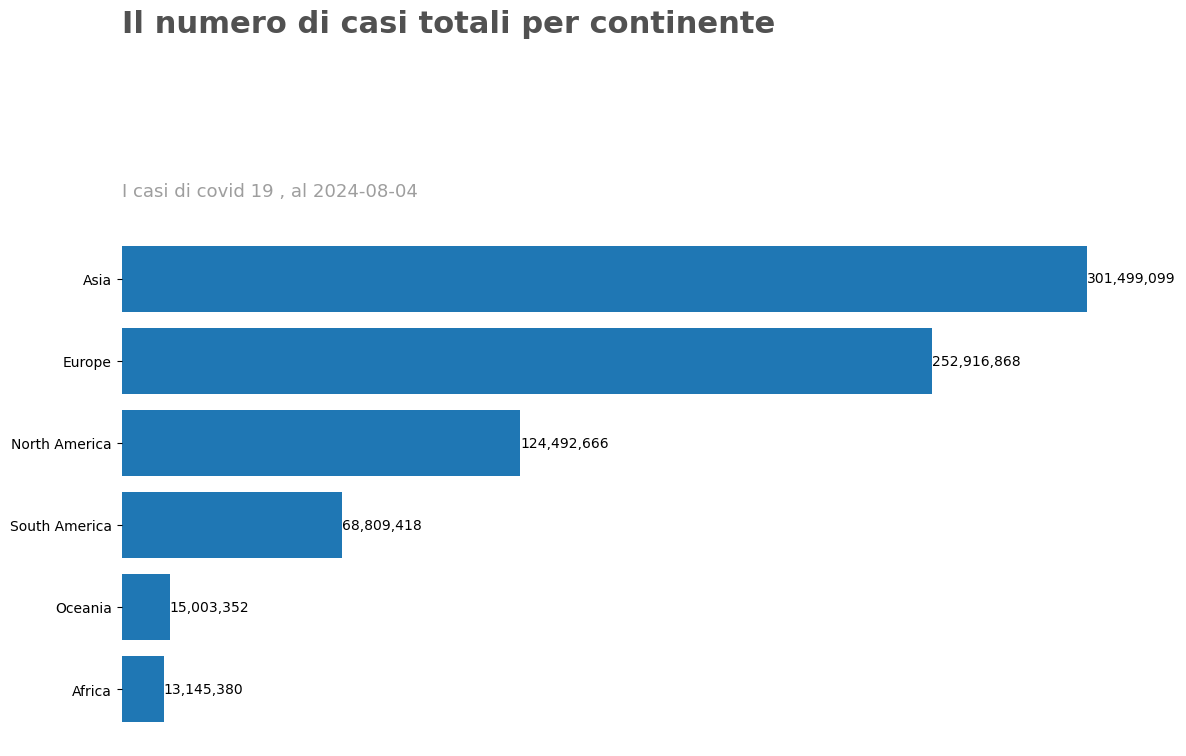

In [460]:
# extra, faccio un plot
ultima_data_continenti = covid_continenti['date'].max().strftime('%Y-%m-%d')

# Seleziona i dati per l'ultima data
top_total_cases_continenti = covid_continenti[
    (covid_continenti['date'] == ultima_data_continenti) & (covid_continenti['location'] != 'World')
][['location', 'total_cases']].sort_values(by="total_cases", ascending=True)

#Creazione del grafico
fig, ax = plt.subplots(figsize=(12, 8))

ax.barh('location', 'total_cases', data=top_total_cases_continenti)

# Rimuovi le linee del grafico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Rimuovi i segni sull'asse x
ax.set_xticks(ticks=[])

# Aggiungi il titolo
plt.text(-1.15, 8, 'Il numero di casi totali per continente', fontsize=22, color='#515151', fontweight='bold')
plt.text(-1.15, 6, f'I casi di covid 19 , al {ultima_data_continenti}', fontsize=13, color='#9E9E9E')

initialx = 0

# Aggiungi le etichette ai bar
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2, f'{p.get_width():,.0f}', va='center')
    initialx += 1

plt.tight_layout()
plt.show()

### 3. Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati: 
### a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
### b. il numero di nuovi casi rispetto alla data

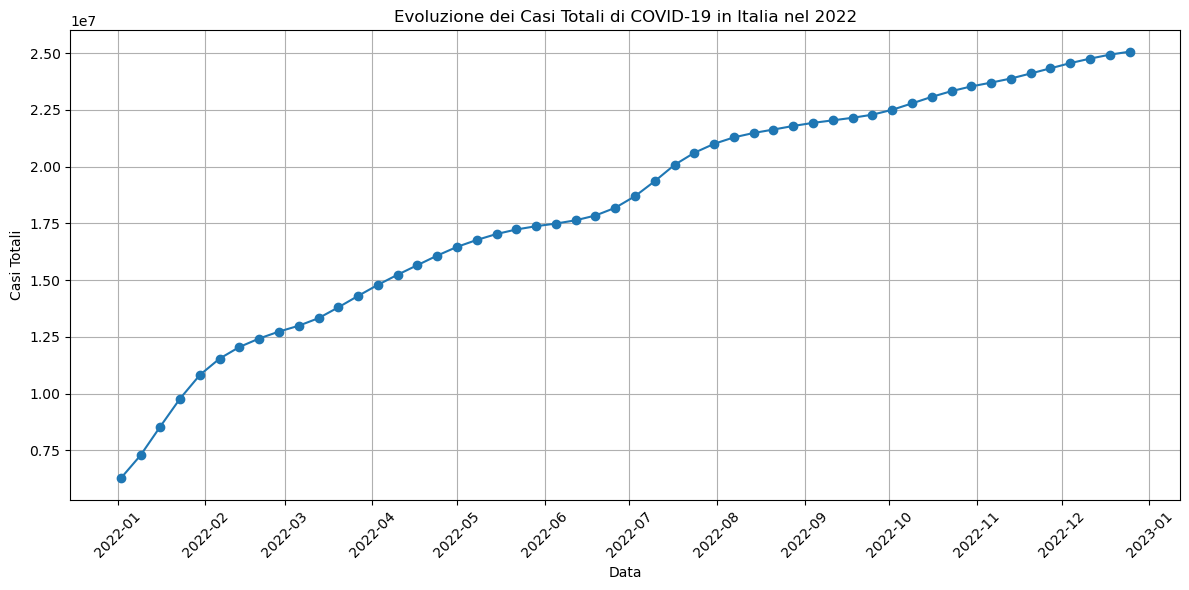

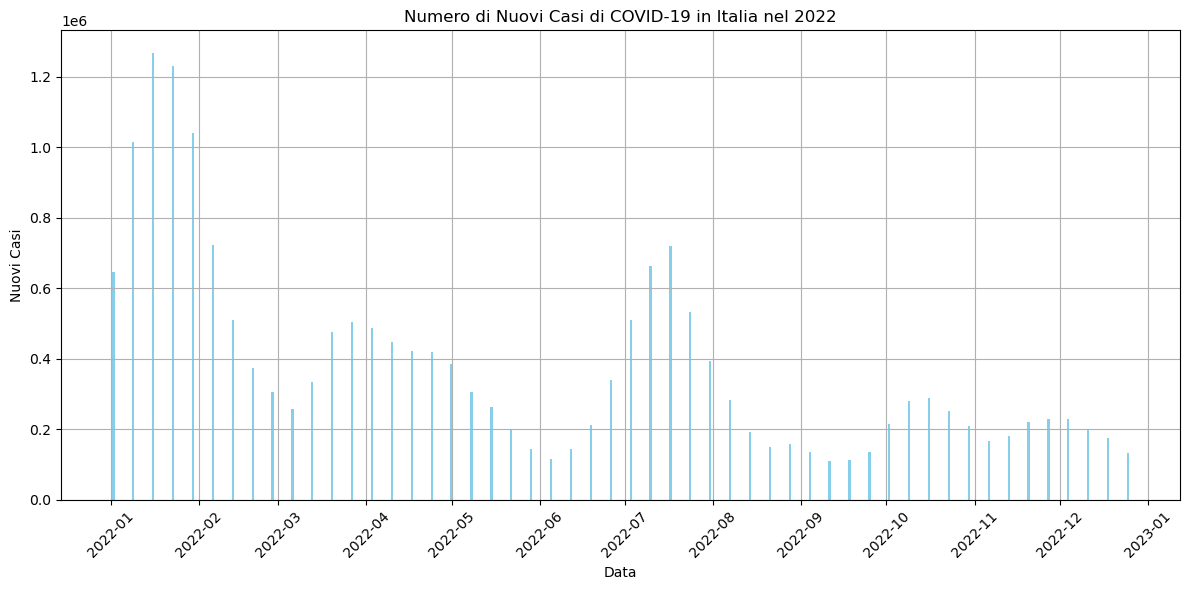

In [382]:
import matplotlib.dates as mdates

# Creo un dataset con i dati relativi all'Italia nel 2022
covid_italy = covid_paesi[
    (covid_paesi['location'] == 'Italy') & 
    (covid_paesi['date'].dt.year == 2022)
]

# Filtro via i giorni che non hanno misurazioni di nuovi casi (assumendo new_cases > 0 indica misurazione)
misura = covid_italy[covid_italy['new_cases'] > 0]

# a. Evoluzione dei casi totali dall'inizio alla fine dell'anno
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(misura['date'], misura['total_cases'], marker='o', linestyle='-')

# Formattazione dell'asse x per mostrare i mesi
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

ax.set_xlabel('Data')
ax.set_ylabel('Casi Totali')
ax.set_title('Evoluzione dei Casi Totali di COVID-19 in Italia nel 2022')
plt.grid(True)
plt.tight_layout()
plt.show()

# b. Numero di nuovi casi rispetto alla data
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(misura['date'], misura['new_cases'], color='skyblue')

# Formattazione dell'asse x per mostrare i mesi
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

ax.set_xlabel('Data')
ax.set_ylabel('Nuovi Casi')
ax.set_title('Numero di Nuovi Casi di COVID-19 in Italia nel 2022')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3. Riguardo le nazioni di Italia, Germania e Francia:
### a. mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)
### b. scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante

In [422]:
# Definisco le nazioni di interesse e l'intervallo di date
nazioni_interesse = ['Italy', 'Germany', 'France']
data_inizio = '2022-05-01'
data_fine = '2023-04-30'

# Filtro il DataFrame per le nazioni e l'intervallo di date
covid_paesi_filtrato = covid_paesi[
    covid_paesi['location'].isin(nazioni_interesse) &
    (covid_paesi['date'] >= data_inizio) &
    (covid_paesi['date'] <= data_fine)
]

covid_paesi_filtrato.sort_values(by='icu_patients', ascending=True).head(30) # Ordina per icu_patients e visualizza i primi 30

,iso_code,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
186470,ITA,Europe,Italy,2023-04-14,25721054.0,0.0,82.0,2809.0
186469,ITA,Europe,Italy,2023-04-13,25721054.0,0.0,83.0,2717.0
186455,ITA,Europe,Italy,2023-03-30,25680148.0,0.0,84.0,2617.0
186465,ITA,Europe,Italy,2023-04-09,25721054.0,19907.0,84.0,2509.0
186463,ITA,Europe,Italy,2023-04-07,25701147.0,0.0,84.0,2524.0
186467,ITA,Europe,Italy,2023-04-11,25721054.0,0.0,85.0,2572.0
186464,ITA,Europe,Italy,2023-04-08,25701147.0,0.0,85.0,2496.0
186462,ITA,Europe,Italy,2023-04-06,25701147.0,0.0,85.0,2524.0
186468,ITA,Europe,Italy,2023-04-12,25721054.0,0.0,85.0,2656.0
186457,ITA,Europe,Italy,2023-04-01,25680148.0,0.0,85.0,2582.0


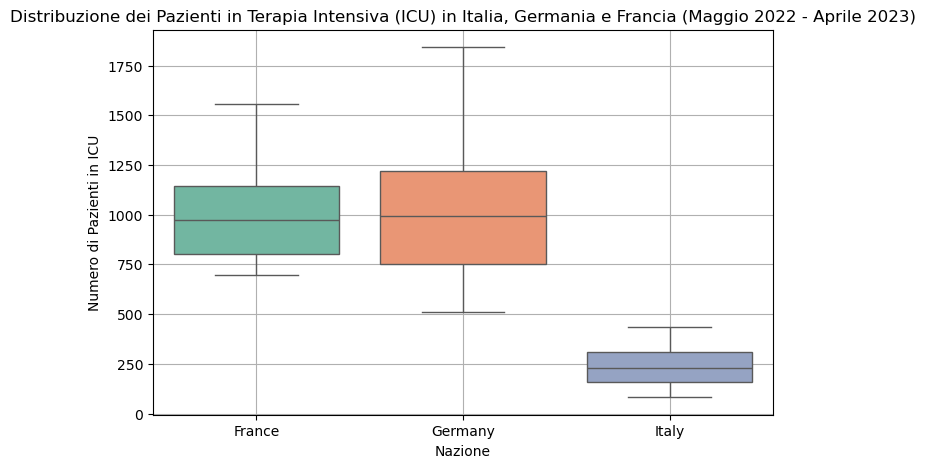

In [420]:
# Definisco le nazioni di interesse e l'intervallo di date
nazioni_interesse = ['Italy', 'Germany', 'France']
data_inizio = '2022-05-01'
data_fine = '2023-04-30'

# Filtra il DataFrame per le nazioni e l'intervallo di date
df_nazioni_icu = covid_paesi[
    covid_paesi['location'].isin(nazioni_interesse) &
    (covid_paesi['date'] >= data_inizio) &
    (covid_paesi['date'] <= data_fine)
].copy()

df_nazioni_icu = df_nazioni_icu.dropna(subset=['icu_patients']) # Rimuovi le righe con valori mancanti per la colonna 'icu_patients'

# a. Boxplot della differenza tra le nazioni riguardo i pazienti in terapia intensiva
plt.figure(figsize=(8, 5))
sns.boxplot(x='location', y='icu_patients', hue='location', data=df_nazioni_icu, palette="Set2", legend=False)
plt.title('Distribuzione dei Pazienti in Terapia Intensiva (ICU) in Italia, Germania e Francia (Maggio 2022 - Aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Numero di Pazienti in ICU')
plt.grid(True)
plt.show()


### Osservando il boxplot si puo notare che Italia ha un numero significativamente inferiore di pazienti in ICU rispetto a Germania e Francia, con valori medi e massimi molto più bassi. I valori piu contenuti d'italia indicanoo un numero di pazienti in ICU inferiore  a quella di Germania e Francia. Germania e Francia hanno un numero mediano di pazienti terapia intensiva intorno ai 1000 - 1200 con una distribuzione abbastanza ampia. Si puo osservare che la Francia ha una distribuzione piu bilanciata rispetto a Germania.

### 5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:
### a. mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients)
### b. se ci sono dati nulli, con un breve commento scrivere se puo essere possible gestirli tramite sostituzione o meno¶

Somma dei pazienti ospitalizzati nel 2021 per nazione:
location
France     6008717.0
Germany          0.0
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64

Numero di valori nulli nella colonna 'hosp_patients': 365


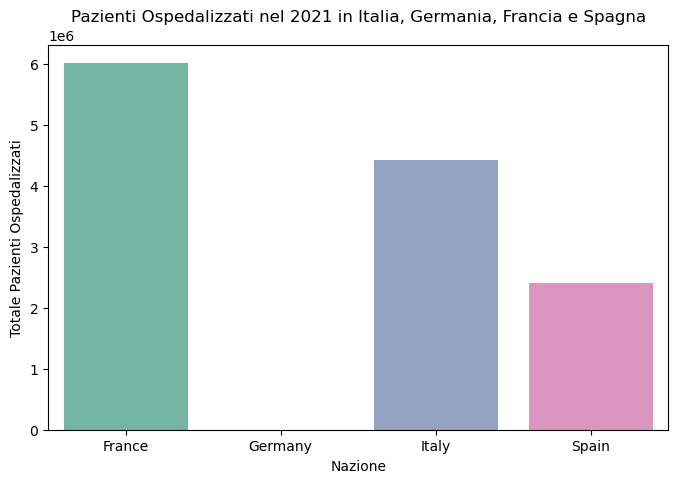

Numero di valori nulli in hosp_patients per nazione:
location
France       0
Germany    365
Italy        0
Spain        0
Name: hosp_patients, dtype: int64


In [415]:
# Definisco le nazioni di interesse e l'anno
nazioni = ['Italy', 'Germany', 'France', 'Spain']
anno = 2021

# Filtro il DataFrame per le nazioni e l'anno
df_nazioni_hosp_2021 = covid_paesi[
    covid_paesi['location'].isin(nazioni) &
    (covid_paesi['date'].dt.year == anno)
].copy()

# Calcola la somma dei pazienti ospitalizzati per ogni nazione
somma_hosp_per_nazione = df_nazioni_hosp_2021.groupby('location')['hosp_patients'].sum()

# Controllo se ci sono valori nulli nella colonna 'hosp_patients'
null_count = df_nazioni_hosp_2021['hosp_patients'].isnull().sum()


print("Somma dei pazienti ospitalizzati nel 2021 per nazione:")
print(somma_hosp_per_nazione)
print(f"\nNumero di valori nulli nella colonna 'hosp_patients': {null_count}")

# Visualizza il grafico a barre
plt.figure(figsize=(8, 5))
sns.barplot(x=somma_hosp_per_nazione.index, y=somma_hosp_per_nazione.values, palette="Set2",hue=somma_hosp_per_nazione.index, legend=False)
plt.xlabel("Nazione")
plt.ylabel("Totale Pazienti Ospedalizzati")
plt.title("Pazienti Ospedalizzati nel 2021 in Italia, Germania, Francia e Spagna")
plt.show()

#Calcolo il numero di valori mancanti per ogni nazione
null_counts = df_nazioni_hosp.groupby('location')['hosp_patients'].apply(lambda x: x.isnull().sum())
print("Numero di valori nulli in hosp_patients per nazione:")
print(null_counts)


### Dato che la Germania ha 365 valori nulli nella colonna hosp_patients non e possibile gestire i valori nulli tramite una sostituzione.